# **Regresión Lineal**

Vamos a tratar de predecir cuántos puntos ganará cada equipo en el campeonato. Primero importamos todas las librerías que usaremos y las instalamos en caso de ser necesario.

In [1]:
# Instalamos las librerías necesarias
%pip install pandas
%pip install seaborn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 14.7/14.7 MB 760.8 kB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importamos las librerías necesarias
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

El próximo paso es cargar los datos limpios.

In [3]:
datos = pd.read_csv('../data/overall_limpio.csv')

Para ver con qué columnas hacemos la regresión, debemos mirar cuanta correlación hay entre ellas.

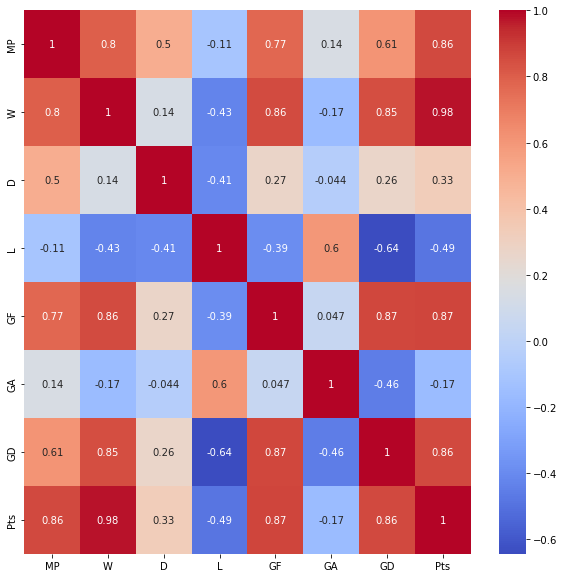

In [4]:
#Ahora vamos a hacer una matriz de correlaciones para ver que columnas están más correlacionadas con el precio
corr = datos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

Podemos observar que la columna de puntos ('Pts') tiene correlación alta con 'GF' (goles a favor), 'GD' (diferencia de goles), 'W' (partidos ganados) y 'MP' (partidos jugados). Esto tiene sentido ya que cuantos más partidos jugados, mayor probabilidad de ganar puntos (además que si has jugado más partidos eso significa que has avanzado en el torneo y por lo tanto, ganado partidos). También es coherente que la columna de partidos ganados tenga alta correlación ya que el hecho de tener una victoria te suma puntos. Los goles a favor te ayudan a ganar el partido, así que la correlación con los puntos es alta, y la diferencia de goles es una variable linealmente dependiente a goles a favor, por lo que también está relacionada con los puntos. El resto de columnas (empates, partidos perdidos y goles en contra) no nos aportan mucha información que pueda facilitar nuestra predicción, así que nos deshacemos de ellas.

In [ ]:
datos = datos.drop(columns=['D', 'L', 'GA'])